## Functions used for calculation of a p-n junction of a solar cell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

# importing module with functions
import solarenergy.functions as sem

#### p-n junction properties

In [2]:
# checking of calculation of voltage built across the junction in [V]
Vbi = sem.junctionVoltage(Na=1e16, Nd=1e18, ni=1.5e10, T=300)
Vbi

0.81211348873158107

In [3]:
# calculation of the width of a depletion zone in [micro m]
W = sem.deplRegWidth(Na=1e16, Nd=1e18, Vbi=Vbi)
W

0.32569829157110974

In [4]:
# diffusivity [cm2/s]
De = 36

# change of carriers density [1/cm3]
n1 = 2.7e16
n2 = 1.0e15
dn = n1 - n2

# length at which the change of carriers density occurs [cm]
dx = 2.0e-4

# diffusion current density [A/cm2]

Jd = sem.diffCurrentDensity(De=De, dn=dn, dx=dx)
Jd

749.736

In [5]:
# calculation of electric field density to compensate the diffusion current

# electron mobility [cm2/Vs]
ne = 1350

E = Jd/(n2*ne*sem.q)
E # [V/cm]

3466.666666666667

In [6]:
# checking if the drift current density at this electric field intensity will be equal to diffusion current density
Jdr = sem.driftCurrentDensity(n=n2, ne=ne, E=E)
Jdr

749.736

#### Law of mass

In [7]:
# intrinsic carrier concentration [1/cm3]
ni = 1.5e10

# n-type doping - concentration of donors [1/cm3]
Nd = 1.0e18

# so minority charge concentration of holes [1/cm3]
p = ni**2/Nd
p

225.0

#### Diffusion length

In [8]:
# diffisivity [cm2/s]
D = 27

# life time [micro s]
tau = 15

# diffusion length [micro m]
L = np.sqrt(D*1e-4 * tau*1e-6)*1e6
L

201.24611797498108

In [9]:
# diffusion length [micro m]
L2 = 200.0

# diffisivity [cm2/s]
D = 27.0

# life time [micro s]
tau = (L*1.0e-6)**2/(D*1.0e-4)*1.0e6
tau

15.0

#### Open circuit voltage

In [10]:
Voc = sem.openCirVoltage(Jph=40, Jo=1.95e-10, T=300)
Voc #[V]

0.67312216097092492

#### Black body radiance
Spectral power density distribution

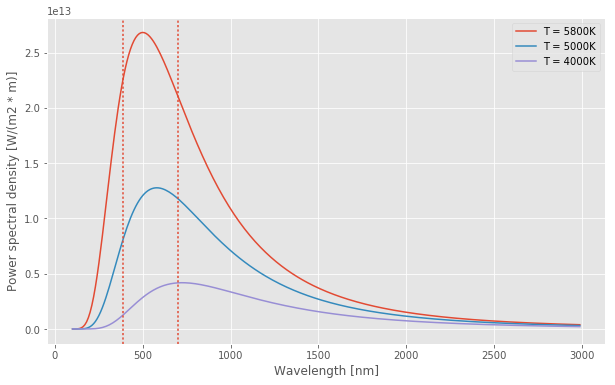

In [11]:
# wavelength
l = np.arange(100e-9, 3000e-9, 10e-9)

P = sem.spectralRadiance(l, 5800)
P2 = sem.spectralRadiance(l, 5000)
P3 = sem.spectralRadiance(l, 4000)

plt.figure(figsize=(10,6))
plt.plot(l*1e9,P, label='T = 5800K')
plt.plot(l*1e9,P2, label='T = 5000K')
plt.plot(l*1e9,P3, label='T = 4000K')
plt.axvline(390, linestyle=':')
plt.axvline(700, linestyle=':')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Power spectral density [W/(m2 * m)]')
plt.legend();